# Example 3: Deep Formulas

The orignal Kolmogorov-Arnold theorem says that it suffices to have 2-Layer function composition (inner and outer functions), but the functions might be non-smooth or even fractal. We generalize KA representation to arbitrary depths. An example a 2-Layer KAN (with smooth activations) is unable to do is: $f(x_1,x_2,x_3,x_4)={\rm exp}({\rm sin}(x_1^2+x_2^2)+{\rm sin}(x_3^2+x_4^2))$, which requires at least 3-Layer KANs.

### Three-layer KAN

In [ ]:
from kan import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[4,2,1,1], grid=3, k=3, seed=1, device=device)
f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
dataset = create_dataset(f, n_var=4, train_num=3000, device=device)

# train the model
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.002, lamb_entropy=2.);

cpu
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.04e-01 | test_loss: 3.08e-01 | reg: 1.10e+01 | : 100%|█| 20/20 [00:12<00:00,  1.57it

saving model version 0.1


In [2]:
model = model.prune(edge_th=1e-2)

saving model version 0.2


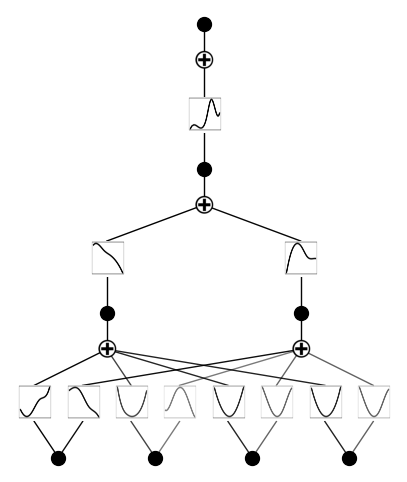

In [3]:
model.plot()

In [6]:
grids = [3,5,10,20,50]
#grids = [5]

train_rmse = []
test_rmse = []

for i in range(len(grids)):
    #model = KAN(width=[4,2,1,1], grid=grids[i], k=3, seed=0, device=device).initialize_from_another_model(model, dataset['train_input'])
    model = model.refine(new_grid=grids[i])#revised from grid=grids[i]
    results = model.fit(dataset, opt="LBFGS", steps=50, stop_grid_update_step=20);
    train_rmse.append(results['train_loss'][-1].item())
    test_rmse.append(results['test_loss'][-1].item())

saving model version 0.3


| train_loss: 2.98e-01 | test_loss: 3.04e-01 | reg: 1.13e+01 | : 100%|█| 50/50 [00:25<00:00,  1.92it


saving model version 0.4
saving model version 0.5


| train_loss: 2.75e-01 | test_loss: 2.98e-01 | reg: 1.09e+01 | : 100%|█| 50/50 [00:25<00:00,  1.98it


saving model version 0.6
saving model version 0.7


| train_loss: 2.36e-01 | test_loss: 2.68e-01 | reg: 1.10e+01 | : 100%|█| 50/50 [00:22<00:00,  2.17it


saving model version 0.8
saving model version 0.9


| train_loss: 2.14e-01 | test_loss: 2.51e-01 | reg: 1.11e+01 | : 100%|█| 50/50 [00:24<00:00,  2.05it


saving model version 0.10
saving model version 0.11


| train_loss: 1.92e-01 | test_loss: 2.56e-01 | reg: 1.11e+01 | : 100%|█| 50/50 [00:32<00:00,  1.53it

saving model version 0.12


Author's note: The scaling isn't optimal. Possibly because of updates on curve2coef, to be investigated. 

[0.2977955937385559, 0.27513933181762695, 0.23605619370937347, 0.21439741551876068, 0.19230987131595612]
[0.3040366470813751, 0.2980234920978546, 0.2676759660243988, 0.2508474588394165, 0.25634777545928955]


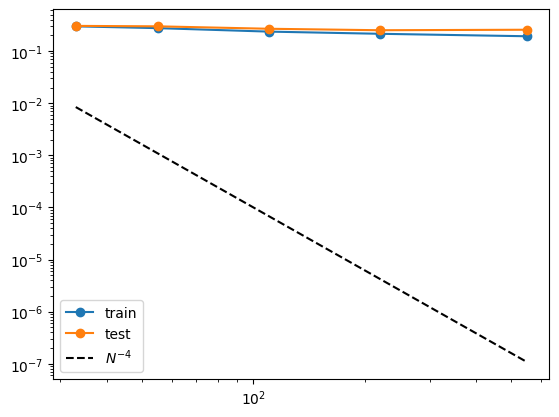

In [7]:
import numpy as np
import matplotlib.pyplot as plt

n_params = np.array(grids) * (4*2+2*1+1*1)
plt.plot(n_params, train_rmse, marker="o")
plt.plot(n_params, test_rmse, marker="o")
plt.plot(n_params, 10000*n_params**(-4.), color="black", ls="--")
plt.legend(['train', 'test', r'$N^{-4}$'], loc="lower left")
plt.xscale('log')
plt.yscale('log')
print(train_rmse)
print(test_rmse)

### Two-layer KAN

Now we show that a 2 two-layer KAN performs much worse for this task

checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                           | 0/20 [00:00<?, ?it/s]

| train_loss: 8.80e-02 | test_loss: 9.27e-02 | reg: 1.34e+01 | : 100%|█| 20/20 [00:12<00:00,  1.57it


saving model version 0.1


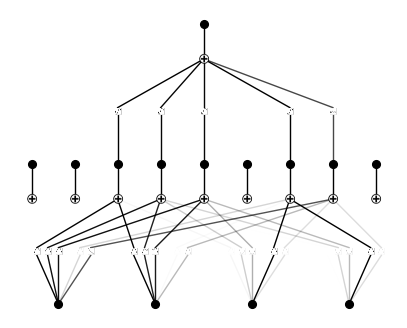

In [8]:
from kan import KAN, create_dataset
import torch

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[4,9,1], grid=3, k=3, seed=0)
f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)
dataset = create_dataset(f, n_var=4, train_num=3000)

# train the model
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.002, lamb_entropy=2.);
model.plot(beta=10)

In [7]:
grids = [3,5,10,20,50]

train_rmse = []
test_rmse = []

for i in range(len(grids)):
    #model = KAN(width=[4,9,1], grid=grids[i], k=3, seed=0).initialize_from_another_model(model, dataset['train_input'])
    model = model.refine(grid=grids[i])
    results = model.fit(dataset, opt="LBFGS", steps=50, stop_grid_update_step=30);
    train_rmse.append(results['train_loss'][-1].item())
    test_rmse.append(results['test_loss'][-1].item())

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.98e-02 | test_loss: 2.21e-02 | reg: 1.70e+01 | : 100%|█| 50/50 [00:15<00:00,  3.23it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.15e-02 | test_loss: 1.40e-02 | reg: 1.71e+01 | : 100%|█| 50/50 [00:13<00:00,  3.75it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 6.69e-03 | test_loss: 9.05e-03 | reg: 1.72e+01 | : 100%|█| 50/50 [00:13<00:00,  3.69it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.38e-03 | test_loss: 8.05e-03 | reg: 1.73e+01 | : 100%|█| 50/50 [00:15<00:00,  3.17it


saving model version 0.1
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.02e-03 | test_loss: 9.89e-03 | reg: 1.73e+01 | : 100%|█| 50/50 [00:17<00:00,  2.88it

saving model version 0.1


[0.01983197219669819, 0.01147659495472908, 0.006687900051474571, 0.004380852449685335, 0.002016218611970544]
[0.022097894921898842, 0.013952379114925861, 0.009049860760569572, 0.008054238744080067, 0.00989140197634697]


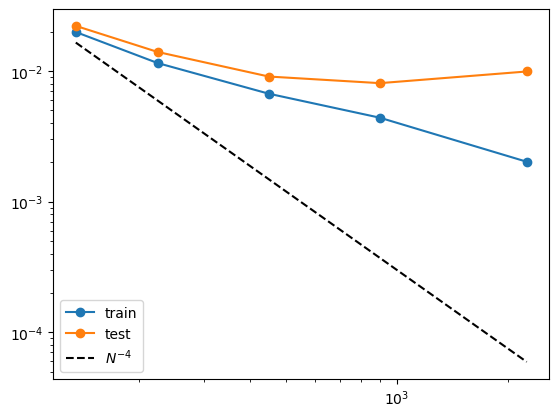

In [8]:
import numpy as np
import matplotlib.pyplot as plt

n_params = np.array(grids) * (4*9+9*1)
plt.plot(n_params, train_rmse, marker="o")
plt.plot(n_params, test_rmse, marker="o")
plt.plot(n_params, 300*n_params**(-2.), color="black", ls="--")
plt.legend(['train', 'test', r'$N^{-4}$'], loc="lower left")
plt.xscale('log')
plt.yscale('log')
print(train_rmse)
print(test_rmse)